# Кластеризация для аналитика

В этом ноутбуке мы разберём:
1. k-means
2. Иерархическую кластеризацию
3. DBSCAN
4. Методы выбора числа кластеров (Elbow, Silhouette)
5. Пример сегментации покупателей

## 1. Что такое кластеризация
Кластеризация — это метод **обучения без учителя**, когда мы группируем объекты по их схожести, не имея заранее меток классов.

**Примеры применения:**
- Сегментация клиентов по поведению
- Группировка товаров по характеристикам
- Сжатие данных и выявление скрытых структур

## 2. k-means
Метод k-средних делит данные на k кластеров так, чтобы минимизировать расстояния объектов до центра кластера.

**Алгоритм:**
1. Выбираем количество кластеров k.
2. Случайно инициализируем центры.
3. Присваиваем объекты ближайшему центру.
4. Пересчитываем центры.
5. Повторяем шаги 3–4, пока центры не стабилизируются.

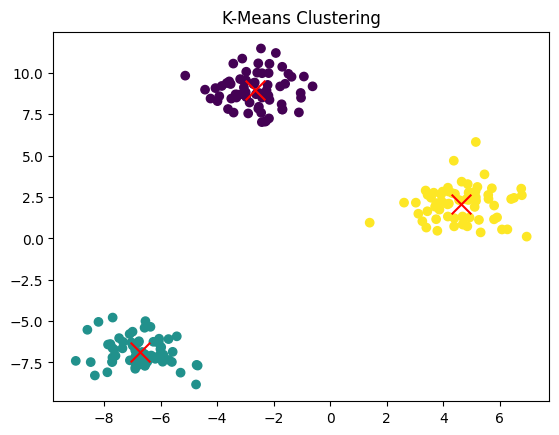

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Генерируем синтетические данные
X, _ = make_blobs(n_samples=200, centers=3, cluster_std=1.0, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='x', s=200)
plt.title('K-Means Clustering')
plt.show()

## 3. Иерархическая кластеризация
Строит дерево объединений объектов (**дендрограмму**).

Виды подходов:
- **Agglomerative** — снизу вверх (объединяем близкие объекты)
- **Divisive** — сверху вниз (делим большие кластеры)

**Плюсы:**
- Не нужно заранее задавать k
- Наглядная визуализация

**Минусы:**
- Медленно на больших данных

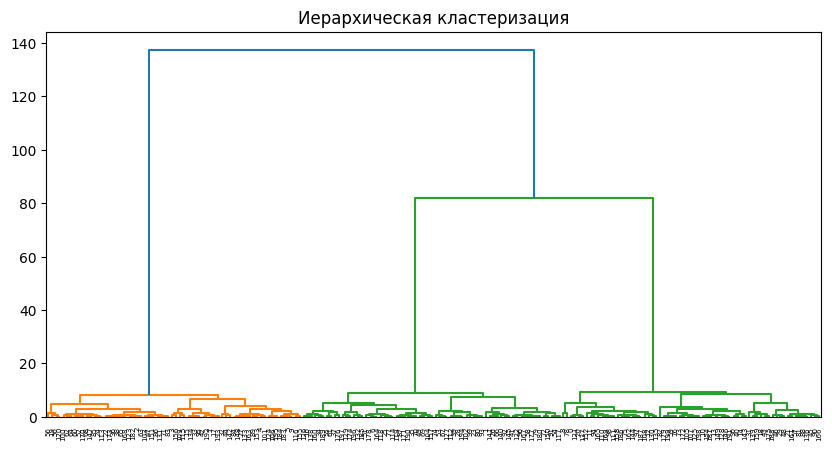

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Иерархическая кластеризация')
plt.show()

## 4. DBSCAN
DBSCAN — алгоритм, который ищет плотные области данных.

**Идея:**
- Точки с достаточным количеством соседей — **ядро**
- Точки вблизи ядра — **пограничные**
- Точки вне плотных областей — **шум**

**Плюсы:**
- Находит кластеры произвольной формы
- Не требует задания k

**Минусы:**
- Нужно подбирать параметры eps и min_samples

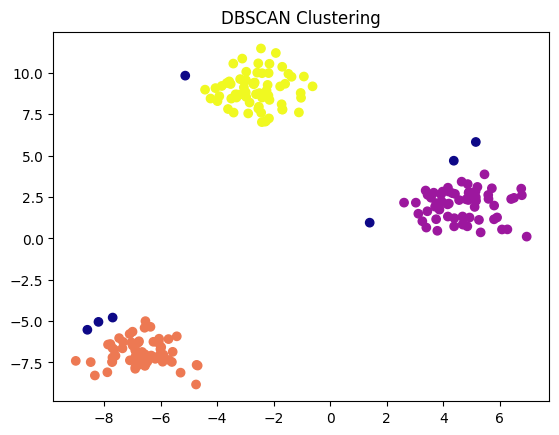

In [3]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.0, min_samples=5)
labels_db = db.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels_db, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.show()

## 5. Определение числа кластеров
**Метод локтя (Elbow)** — смотрим график зависимости суммы квадратов расстояний до центров от k, выбираем точку излома.

**Коэффициент силуэта (Silhouette)** — показывает, насколько хорошо объекты внутри кластера похожи друг на друга по сравнению с соседними кластерами.

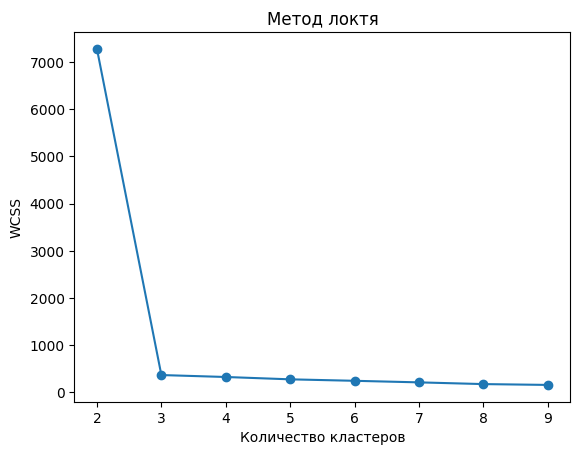

Silhouette Score (k=3): 0.8467003894636074


In [4]:
from sklearn.metrics import silhouette_score

wcss = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(2, 10), wcss, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

# Silhouette для k=3
km3 = KMeans(n_clusters=3, random_state=42)
labels3 = km3.fit_predict(X)
print('Silhouette Score (k=3):', silhouette_score(X, labels3))

## 6. Пример: сегментация покупателей
Представим, что у нас есть данные о возрасте и годовом доходе клиентов, и мы хотим разделить их на сегменты для маркетинга.

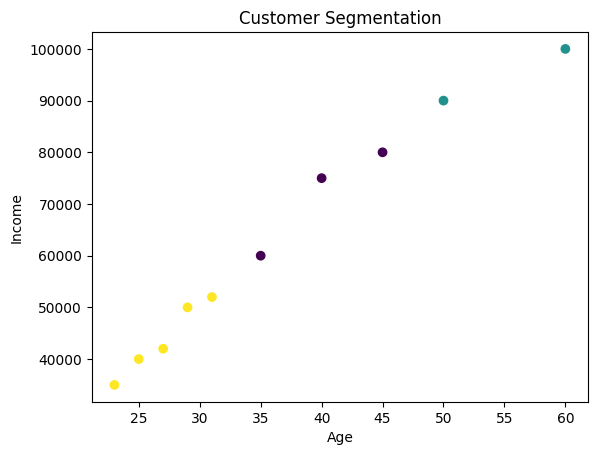

,age,income,cluster
0,25,40000,2
1,45,80000,0
2,29,50000,2
3,35,60000,0
4,40,75000,0
5,23,35000,2
6,31,52000,2
7,50,90000,1
8,60,100000,1
9,27,42000,2


In [5]:
data = pd.DataFrame({
    'age': [25, 45, 29, 35, 40, 23, 31, 50, 60, 27],
    'income': [40000, 80000, 50000, 60000, 75000, 35000, 52000, 90000, 100000, 42000]
})

km = KMeans(n_clusters=3, random_state=42)
data['cluster'] = km.fit_predict(data[['age', 'income']])

plt.scatter(data['age'], data['income'], c=data['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Segmentation')
plt.show()

data

## Задания для практики
1. Объясните разницу между k-means и DBSCAN.
2. Реализуйте метод локтя и силуэт для своего датасета.
3. Проведите иерархическую кластеризацию на своих данных.
4. Измените параметры eps и min_samples для DBSCAN и сравните результаты.
5. Постройте сегментацию покупателей с 4 кластерами и проанализируйте их характеристики.